### Pycaret useful functions : 
 - **Getting Data**: How to import data from PyCaret repository
 - **Setting up Environment**: How to setup an experiment in PyCaret and get started with building regression models
 - **Create Model**: How to create a model, perform cross validation and evaluate regression metrics
 - **Tune Model**: How to automatically tune the hyperparameters of a regression model using GridsearchCV. To use the custom search grid, you can pass custom_grid parameter in the tune_model function. By default, tune_model optimizes R2 but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'MAE') will search for the hyperparameters  that results in the lowest MAE instead of highest R2.
 - **Plot Model**: How to analyze model performance using various plots
 - **Predict Model**: How to make prediction on new / unseen data
 - **Finalize Model**: How to finalize the best model at the end of the experiment. This function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.
 - **Save / Load Model**: How to save / load a model for future use
 

In [3]:
#!pip install pycaret

In [1]:
import pycaret

In [2]:
print(pycaret.__version__)

2.3.4


### Contexte:  Problème d'entreprise
  - Une compagnie d'assurance souhaite améliorer ses prévisions de flux de trésorerie en prédisant mieux les frais des patients à l'aide de mesures démographiques et de base des risques pour la santé des patients au moment de l'hospitalisation.

### Objectif :
  -  Pour créer une application Web où les informations démographiques et de santé d'un patient sont saisies dans un formulaire Web pour prédire les frais.
### Tâches :
  - Entraînez et validez des modèles et développez un pipeline d'apprentissage automatique pour le déploiement.
  - Construisez une interface HTML basique avec un formulaire de saisie pour les variables indépendantes (âge, sexe, IMC, enfants, fumeur, région).
  - Créez un back-end de l'application Web à l'aide d'un cadre Flask.
  - Déployez l'application Web sur Heroku. Une fois déployé, il deviendra accessible au public et accessible via une URL Web.

### Get Data 

In [4]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
data['age'].value_counts()[:10]

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
Name: age, dtype: int64

In [10]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

# Experiment 1

In [12]:
from pycaret.regression import *

### Setting up Environment in PyCaret

In [13]:
s = setup(data, target = 'charges',numeric_features=['age','bmi','children'],session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 9)"


### Create a  Model

In [14]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4222.9619,33775764.0000,5811.6919,0.7983,0.4879,0.4328
1,4522.5815,43620024.0000,6604.5459,0.7464,0.5473,0.4216
2,3853.0376,31981114.0000,5655.1846,0.5951,0.7108,0.4398
3,3707.7695,26513358.0000,5149.1123,0.7786,0.4891,0.5164
4,4484.2129,43828452.0000,6620.3062,0.6740,0.5761,0.3847
5,4113.6235,35882344.0000,5990.1875,0.7692,0.5464,0.4130
6,4098.0859,39631320.0000,6295.3413,0.7303,0.5745,0.4266
7,4833.7729,45739260.0000,6763.0806,0.7485,0.5887,0.3967
8,4621.0620,40681912.0000,6378.2373,0.7372,0.7032,0.5225
9,4578.4497,42227036.0000,6498.2334,0.7280,0.7252,0.4793


### Plot a Model
 - There are over 10 plots available, please see the plot_model() docstring for the list of available plots.

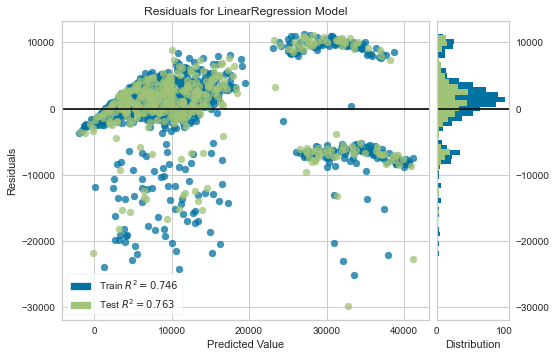

In [15]:
plot_model(lr)

# Experiment 2

In [16]:
s2 = setup(data, target = 'charges',numeric_features=['age','bmi','children'], session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True,remove_outliers=True,
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(889, 48)"


- Dans PyCaret, les caractéristiques numériques continues peuvent être regroupées en intervalles à l'aide  du paramètre **bin_numeric_features** dans la configuration.

In [17]:
s2[8]

,children,tan(bmi),sin(bmi),age_Power2,bmi_Power2,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,...,age_Power2_multiply_smoker_yes,bmi_Power2_multiply_age_Power2,smoker_yes_multiply_age_Power2,age_Power2_multiply_tan(bmi),tan(bmi)_multiply_smoker_yes,age_Power2_multiply_sin(bmi),bmi_Power2_multiply_smoker_yes,sin(bmi)_multiply_children,smoker_yes_multiply_sex_male,tan(bmi)_multiply_children
650,0.758494,0.017997,-1.335009,0.597312,2.259463,0.0,0.0,0.0,0.0,1.0,...,0.000000,1.349604,0.000000,0.010750,0.000000,-0.797416,0.000000,-1.012596,0.0,0.013651
319,-0.060365,0.027168,-0.479099,-0.624317,1.120715,1.0,0.0,1.0,0.0,0.0,...,-0.000000,-0.699682,-0.000000,-0.016962,0.000000,0.299110,0.000000,0.028921,0.0,-0.001640
314,-0.879223,0.028198,-0.000231,-0.886031,0.034522,0.0,1.0,0.0,0.0,0.0,...,-0.886031,-0.030588,-0.886031,-0.024984,0.028198,0.000205,0.034522,0.000203,0.0,-0.024792
150,-0.060365,0.023826,-1.164375,-0.445997,-1.040384,1.0,0.0,0.0,1.0,0.0,...,-0.000000,0.464008,-0.000000,-0.010626,0.000000,0.519307,-0.000000,0.070287,0.0,-0.001438
336,-0.879223,0.030202,0.825407,1.661025,-0.826600,1.0,0.0,0.0,0.0,1.0,...,0.000000,-1.373003,0.000000,0.050166,0.000000,1.371021,-0.000000,-0.725716,0.0,-0.026554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0.758494,0.027780,-0.205884,-0.113309,-0.930567,1.0,0.0,0.0,0.0,1.0,...,-0.000000,0.105442,-0.000000,-0.003148,0.000000,0.023328,-0.000000,-0.156162,0.0,0.021071
973,-0.879223,0.027243,0.492548,-1.212509,1.776645,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-2.154197,-0.000000,-0.033033,0.000000,-0.597219,0.000000,-0.433060,0.0,-0.023953
1250,-0.879223,0.214545,-1.385283,-1.021768,-0.221438,1.0,1.0,1.0,0.0,0.0,...,-1.021768,0.226258,-1.021768,-0.219215,0.214545,1.415437,-0.221438,1.217972,1.0,-0.188633
887,-0.879223,0.012287,-1.363976,-0.383008,-0.191160,0.0,0.0,0.0,1.0,0.0,...,-0.000000,0.073216,-0.000000,-0.004706,0.000000,0.522414,-0.000000,1.199239,0.0,-0.010803


In [18]:
# Formation et validation du modèle
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2557.5171,17581964.0000,4193.0854,0.8817,0.3906,0.3067
1,3544.2395,36480856.0000,6039.9385,0.7647,0.4728,0.3459
2,2693.2129,20991608.0000,4581.6602,0.7696,0.5150,0.3676
3,3595.7578,30745920.0000,5544.9004,0.7478,0.5326,0.4830
4,3289.5046,28286774.0000,5318.5312,0.7753,0.4747,0.3239
5,3009.7605,21916624.0000,4681.5195,0.8611,0.3922,0.3160
6,2715.0334,22424046.0000,4735.4033,0.8297,0.4022,0.3083
7,3030.0544,25351334.0000,5035.0107,0.8285,0.4638,0.3165
8,3251.3323,27735696.0000,5266.4692,0.8010,0.4811,0.4081
9,3484.9546,30461146.0000,5519.1616,0.7941,0.5145,0.3865


- Notez l'impact des transformations et de l'ingénierie automatique des fonctionnalités. **Le R2 a augmenté de 10% avec très peu d'effort**. Nous pouvons comparer le tracé résiduel du modèle de régression linéaire pour les deux expériences et observer l'impact des transformations et de l'ingénierie des caractéristiques sur l' hétéroscédasticité du modèle.

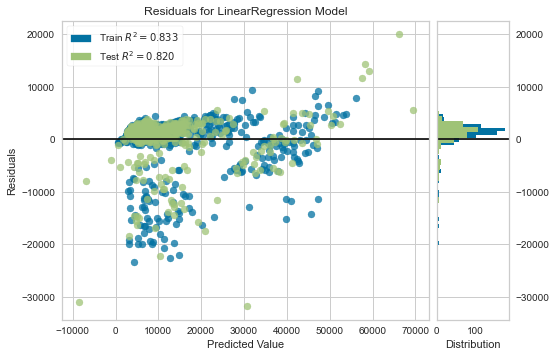

In [19]:
# tracer les résidus du modèle entraîné
plot_model(lr,plot='residuals')

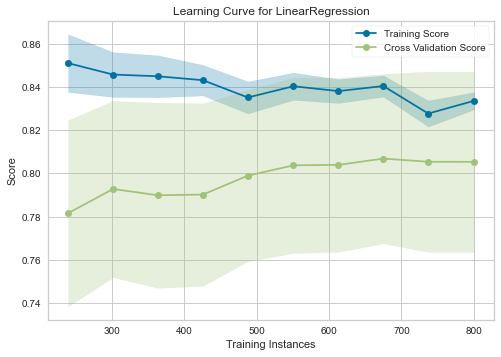

In [20]:
# tracer le learning curve du modèle entraîné
plot_model(lr,plot='learning')

- L'apprentissage automatique est un processus itératif . Le nombre d'itérations et de techniques utilisées dépend de l'importance de la tâche et de l'impact que cela aura si les prédictions sont erronées. La gravité et l'impact d'un modèle d'apprentissage automatique pour prédire le résultat d'un patient en temps réel dans l'unité de soins intensifs d'un hôpital sont bien plus qu'un modèle conçu pour prédire l'attrition des clients.
- Dans ce tutoriel, nous n'avons effectué que deux itérations et le modèle de régression linéaire de la deuxième expérience sera utilisé pour le déploiement. À ce stade, cependant, le modèle n'est encore qu'un objet dans le cahier. Pour l'enregistrer en tant que fichier pouvant être transféré et utilisé par d'autres applications, exécutez le code suivant :

In [21]:
# Below is a list of models that Pycaret can use for regression. 
# The ID for each regression can be used to include or exclude models for various functions.
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### COMPARING ALL MODELS 

In [22]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,3048.9289,24752984.8202,4944.7053,0.8173,0.4364,0.3333,0.0170
llar,Lasso Least Angle Regression,3053.4043,24916045.2328,4966.7004,0.8154,0.4576,0.3579,0.0210
br,Bayesian Ridge,3101.0986,25261348.4919,4997.4551,0.8132,0.4648,0.3534,0.0190
ridge,Ridge Regression,3099.0559,25273634.6000,4998.8999,0.8131,0.4638,0.3526,0.0140
lasso,Lasso Regression,3098.6489,25551690.0000,5028.9215,0.8107,0.4613,0.3523,0.0180
lr,Linear Regression,3117.1367,26197596.8000,5091.5680,0.8054,0.4640,0.3562,0.0150
gbr,Gradient Boosting Regressor,2903.7232,26197839.9052,5091.9129,0.8030,0.4858,0.3669,0.1260
huber,Huber Regressor,2043.1758,27007098.2205,5163.2762,0.8007,0.4058,0.0818,0.0390
rf,Random Forest Regressor,2988.6543,26836496.3737,5161.1375,0.7986,0.5035,0.3915,0.2650
par,Passive Aggressive Regressor,2044.9983,27368673.7447,5197.0512,0.7982,0.4063,0.0818,0.0570


### Tune a Model 

In [23]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2557.5164,17581956.0000,4193.0845,0.8817,0.3906,0.3067
1,3544.2388,36480856.0000,6039.9385,0.7647,0.4728,0.3459
2,2693.2148,20991576.0000,4581.6562,0.7696,0.5150,0.3676
3,3595.7556,30745890.0000,5544.8975,0.7478,0.5326,0.4830
4,3289.5022,28286772.0000,5318.5308,0.7753,0.4747,0.3239
5,3009.7622,21916626.0000,4681.5195,0.8611,0.3922,0.3160
6,2715.0347,22424030.0000,4735.4019,0.8297,0.4022,0.3083
7,3030.0562,25351364.0000,5035.0137,0.8285,0.4638,0.3165
8,3251.3308,27735690.0000,5266.4683,0.8010,0.4811,0.4081
9,3484.9502,30461138.0000,5519.1611,0.7941,0.5145,0.3865


In [24]:
print(tuned_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


In [25]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Predict on Test / Hold-out Sample 
 - All of the evaluation metrics we have seen above are cross-validated results based on training set (70%) only. Now, using our final trained model stored in the tuned_lr variable we will predict the test set and evaluate the metrics to see if they are materially different than the CV results.

In [26]:
predict_model(tuned_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3130.2288,26017738.0000,5100.7588,0.8179,0.4527,0.3594


- The R2 on the test set is **0.8179 compared to 0.8054** achieved on tuned_lr CV results (in section tunde_lr). This is not a significant difference. If there is a large variation between the test and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation.

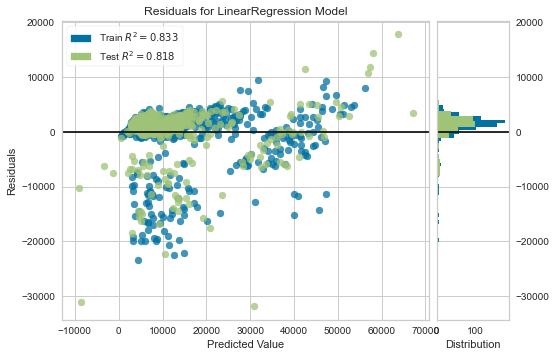

In [27]:
# plot the residuals of the tuning model
plot_model(tuned_lr,plot='residuals')

### Finalize the Model
 - Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as **hyperparameter tuning**, **ensembling**, **stacking** etc. This workflow will eventually lead you to the best model for use in making **predictions on new and unseen data**. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [28]:
final_lr = finalize_model(tuned_lr);

In [29]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


In [30]:
predict_model(final_lr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2664.8967,18203604.0000,4266.5684,0.8726,0.3868,0.3031


- Notice how the R2 in the final_lr has **increased to 0.8723 from 0.8135**, even though the model is same. This is because the final_lr variable is trained on the complete dataset including the test set.

### Predict on Unseen Data

In [33]:
data_unseen = {'age': [55,19,20,25,27,18], 
               'sex': ['male','female','male','male','female','male'], 
               'bmi': [59,27.90,18,24,20,19], 
               'children': [1,0,5,4,3,3], 
               'smoker': ['yes','yes','no','no','yes','no'], 
               'region': ['northwest','southwest','northwest','northeast','northeast','southeast']}

data_unseen = pd.DataFrame(data_unseen,columns=['age','sex','bmi','children','smoker','region'])
data_unseen

,age,sex,bmi,children,smoker,region
0,55,male,59.0,1,yes,northwest
1,19,female,27.9,0,yes,southwest
2,20,male,18.0,5,no,northwest
3,25,male,24.0,4,no,northeast
4,27,female,20.0,3,yes,northeast
5,18,male,19.0,3,no,southeast


In [34]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,Label
0,55,male,59.0,1,yes,northwest,82805.992188
1,19,female,27.9,0,yes,southwest,20999.593750
2,20,male,18.0,5,no,northwest,4565.912109
3,25,male,24.0,4,no,northeast,6285.470703
4,27,female,20.0,3,yes,northeast,18385.673828


In [35]:
unseen_predictions = predict_model(lr, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,Label
0,55,male,59.0,1,yes,northwest,102298.679688
1,19,female,27.9,0,yes,southwest,20769.515625
2,20,male,18.0,5,no,northwest,4471.147949
3,25,male,24.0,4,no,northeast,7656.207031
4,27,female,20.0,3,yes,northeast,12665.041992


In [36]:
unseen_predictions = predict_model(tuned_lr, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,Label
0,55,male,59.0,1,yes,northwest,100031.359375
1,19,female,27.9,0,yes,southwest,20769.529297
2,20,male,18.0,5,no,northwest,4471.120605
3,25,male,24.0,4,no,northeast,7656.197266
4,27,female,20.0,3,yes,northeast,12665.084961


### Save a Model
 - We have now finished the experiment by finalizing the **tuned_lr model** which is now stored in **final_lr** variable. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [37]:
# enregistrer le pipeline de transformation et le modèle 
#save_model (lr, model_name = 'deployment_18102021')
save_model(final_lr, 'deployment_19102021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['age', 'bmi',
                                                           'children'],
                                       target='charges', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                   

In [38]:
deployment_19102021 = load_model('deployment_19102021')

Transformation Pipeline and Model Successfully Loaded


In [39]:
deployment_19102021

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['age', 'bmi',
                                                          'children'],
                                      target='charges', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target

- Nous avons terminé notre première tâche de formation et de sélection d'un modèle à déployer. Le pipeline d'apprentissage automatique final et le modèle de régression linéaire sont désormais enregistrés en tant que fichier sur le lecteur local sous l'emplacement défini dans la fonction save_model().
- Dans cet exemple : c:/nom d'utilisateur/Downloads/deployment-heroku-pycaret/deployment_19102021.pkl).

### Précision : 
- Si vous vous souvenez de l'étape 1 ci-dessus, nous avons finalisé le modèle de régression linéaire qui a été formé sur 56 fonctionnalités qui ont été automatiquement conçues par PyCaret. Cependant, le front-end de notre application Web a un formulaire de saisie qui ne collecte que les six caractéristiques, c'est-à-dire **l'âge**, **le sexe**, **l'IMC**, **les enfants**, **le fumeur** et **la région**.

- Comment transformer 6 caractéristiques d'un nouveau point de données en temps réel en 56 caractéristiques sur lesquelles le modèle a été formé ? Avec une séquence de transformations appliquée lors de la formation du modèle, le codage devient une tâche de plus en plus complexe et chronophage.
- Dans PyCaret, toutes les transformations telles que l'encodage catégoriel, la mise à l'échelle, l'imputation des valeurs manquantes, l'ingénierie des caractéristiques et même la sélection des caractéristiques sont automatiquement exécutées en temps réel avant de générer des prédictions.

### NB :
- Imaginez la quantité de code que vous auriez dû écrire pour appliquer toutes les transformations dans un ordre strict avant même de pouvoir utiliser votre modèle pour les prédictions. **En pratique, lorsque vous pensez à l'apprentissage automatique, vous devez penser à l'ensemble du pipeline de ML et pas seulement au modèle**.

- Imaginez maintenant que vous disposez déjà d'une application d'entreprise dans laquelle vous souhaitez intégrer les prédictions de votre modèle. Ce dont vous avez besoin, c'est d'un service Web où vous pouvez effectuer un appel API avec des points de données d'entrée et récupérer les prédictions. Pour ce faire, nous avons créé la fonction **predict_api** dans notre fichier **app.py**

In [49]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75716.0
